# **Credit Card Fraud Detection using Scikit-Learn and Snap ML**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import time
import warnings

In [7]:
data =pd.read_csv('datasets/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.shape

(284807, 31)

# inflating the values by 10

In [21]:
big_data=pd.DataFrame(np.repeat(data.values,10,axis=0),columns=data.columns)

In [22]:
big_data.shape

(2848070, 31)

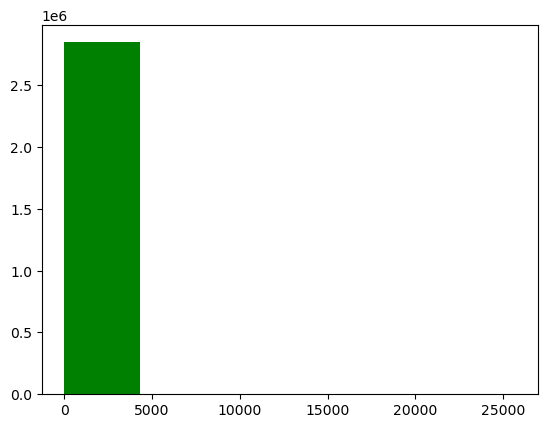

In [23]:
plt.hist(big_data['Amount'],6,histtype='bar',facecolor='g')
plt.show()

# dataset preparation

In [24]:
big_data.iloc[:,1:30]=StandardScaler().fit_transform(big_data.iloc[:,1:30])

In [28]:
x=big_data.iloc[:,1:30]
y=big_data.iloc[:,30]

In [30]:
x=normalize(x,norm='l1')

In [31]:
x.shape, y.shape

((2848070, 29), (2848070,))

In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((2278456, 29), (569614, 29), (2278456,), (569614,))

# build a decision tree classifier model with scikit-learn

In [34]:
w_train=compute_sample_weight('balanced',ytrain)
w_train

array([0.50086524, 0.50086524, 0.50086524, ..., 0.50086524, 0.50086524,
       0.50086524])

In [35]:
model_dt=DecisionTreeClassifier(max_depth=4,random_state=35)

In [46]:
t0=time.time()
model_dt.fit(xtrain,ytrain,sample_weight=w_train)
sk_time=time.time()-t0
print(sk_time)

41.85692095756531


# build a decision tree classifier model with snap ML

In [44]:
from snapml import DecisionTreeClassifier

In [45]:
snapml_model=DecisionTreeClassifier(max_depth=4,random_state=45,n_jobs=4)

In [47]:
t0=time.time()
snapml_model.fit(xtrain,ytrain,sample_weight=w_train)
snapml_time=time.time()-t0
print(snapml_time)

2.6090142726898193


In [49]:
training_speedup = sk_time/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))


[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 16.04x 


In [62]:
sk_pred=model_dt.predict_proba(xtest)[:,1]
sk_pred

array([0.0997819 , 0.03271422, 0.03271422, ..., 0.0997819 , 0.03271422,
       0.0997819 ])

In [63]:
snapml_pred=snapml_model.predict_proba(xtest)[:,1]
snapml_pred

array([0.09748348, 0.03764921, 0.03764921, ..., 0.09748348, 0.03764921,
       0.09748348])

In [67]:
sklearn_roc_auc=roc_auc_score(ytest,sk_pred)
# ytest.shape, sk_pred.shape
sklearn_roc_auc
snap_roc_auc=roc_auc_score(ytest,snapml_pred)
sklearn_roc_auc, snap_roc_auc

(0.9724840470227328, 0.9637966972465127)

# build a support vector machine

In [68]:
from sklearn.svm import LinearSVC

In [69]:
sklearn_svm=LinearSVC(class_weight='balanced',random_state=31,loss='hinge',fit_intercept=False)

In [70]:
t0=time.time()
sklearn_svm.fit(xtrain,ytrain)
sklearn_time=time.time() - t0

E:\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
E:\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [71]:
sklearn_time

60.84009337425232

In [72]:
from snapml import SupportVectorMachine
snapml_svm=SupportVectorMachine(class_weight='balanced',random_state=25,n_jobs=4,fit_intercept=False)

In [73]:
t0=time.time()
model=snapml_svm.fit(xtrain,ytrain)
snapml_time=time.time()-t0
snapml_time

7.744500398635864

In [74]:
sk_pred=sklearn_svm.decision_function(xtest)
sk_pred

array([-0.97536008, -0.73222166, -2.1243416 , ..., -0.79095356,
       -1.11373453, -1.07423129])

In [75]:
ml_pred=snapml_svm.decision_function(xtest)
ml_pred

array([-0.95683783, -0.7349642 , -2.1244232 , ..., -0.78612204,
       -1.10701218, -1.06875786])

In [76]:
roc_auc_score(ytest,sk_pred),roc_auc_score(ytest,ml_pred)

(0.9853213271550263, 0.985289706081469)